<a href="https://colab.research.google.com/github/NumKate/CSST102_CS3B/blob/main/3B_MACASAET_MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine-Problem-2-Predicting House Prices with Multiple Regression**

**Proble statement:** You are a data scientist working for a real estate company. Your task is to develop a predictive model that can estimate the prices of houses in a particular city. The dataset provided includes multiple features, such as the size of the house (in square feet), the number of bedrooms, the age of the house, the proximity to downtown (in miles), and the house price. Your goal is to build a multiple regression model that can accurately predict house prices based on these features

# **1. Data Exploration and Visualization**

To find out how the attributes and housing prices relate to one another, we must first load the dataset and conduct exploratory data analysis, or EDA.

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


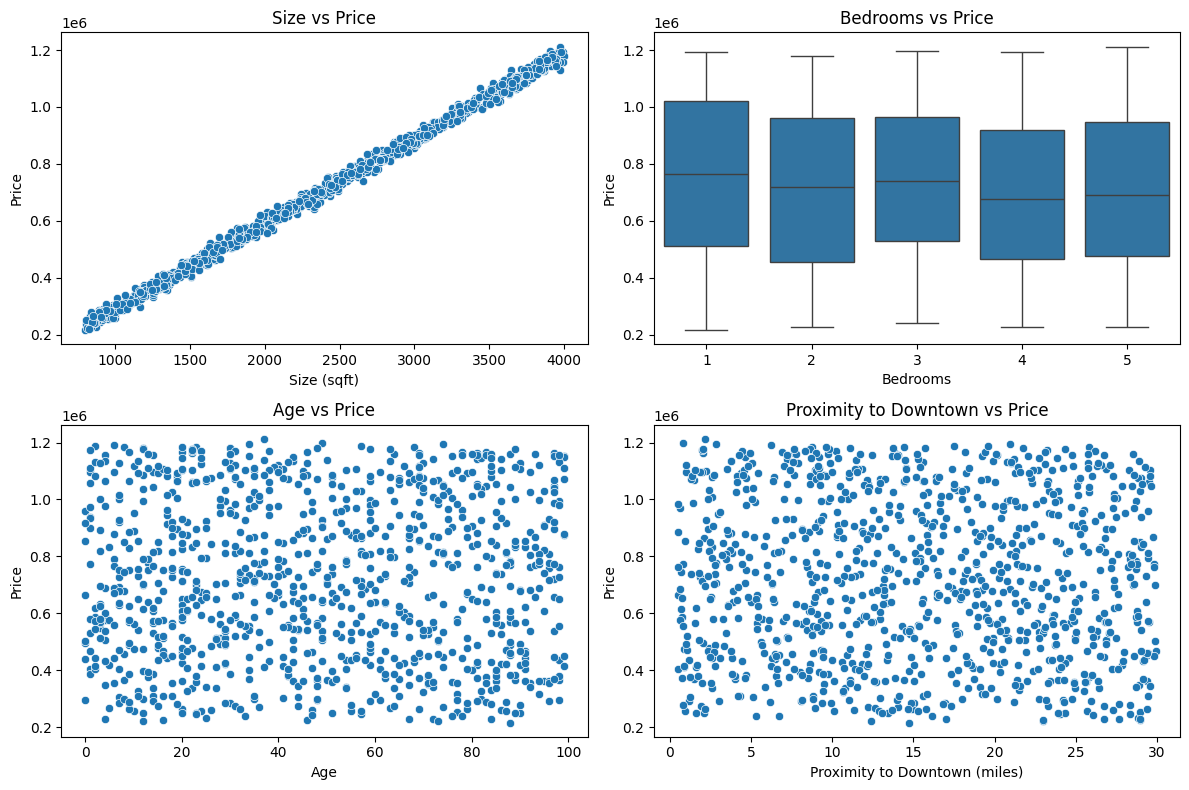

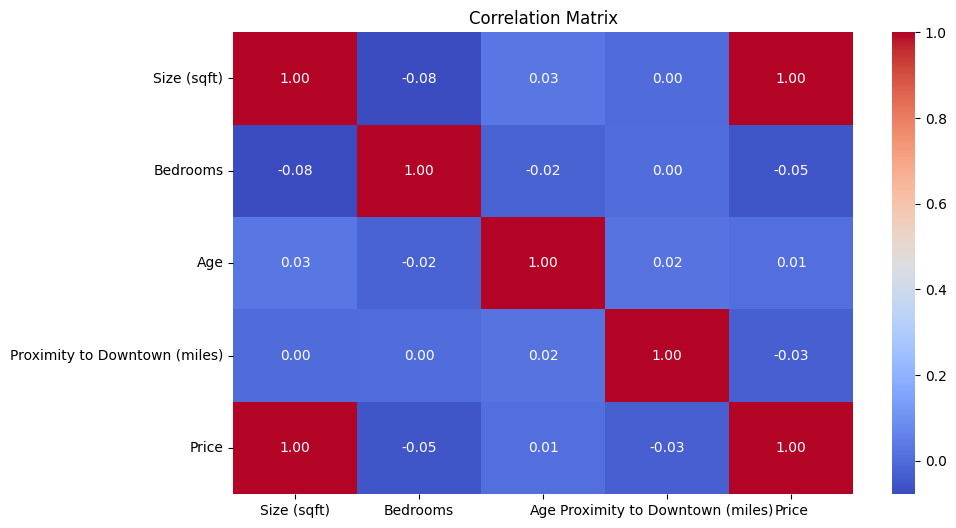

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("datasets_house_prices.csv")

# Display the first few rows of the dataset
print(data.head())

# Visualize the relationships using scatter plots
plt.figure(figsize=(12, 8))

# Scatter plot for Size vs Price
plt.subplot(2, 2, 1)
sns.scatterplot(x='Size (sqft)', y='Price', data=data)
plt.title('Size vs Price')

# Scatter plot for Bedrooms vs Price
plt.subplot(2, 2, 2)
sns.boxplot(x='Bedrooms', y='Price', data=data)
plt.title('Bedrooms vs Price')

# Scatter plot for Age vs Price
plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Price', data=data)
plt.title('Age vs Price')

# Scatter plot for Proximity to Downtown vs Price
plt.subplot(2, 2, 4)
sns.scatterplot(x='Proximity to Downtown (miles)', y='Price', data=data)
plt.title('Proximity to Downtown vs Price')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **2. Data Preprocessing**
After that, we must deal with any missing information and standardize the features.

In [5]:
# Check for missing values
print(data.isnull().sum())

# If there are missing values, we can drop them or fill them
data = data.dropna()  # For simplicity, we drop missing values

# Normalize the data (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)', 'Price']] = scaler.fit_transform(
    data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)', 'Price']]
)

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


# **3. Model Development**
We can now use Scikit-learn to create the multiple regression model.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = data['Price']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# **4. Model Evaluation**
R-squared and Mean Squared Error (MSE) will be used to assess the model.

Mean Squared Error: 0.00
R-squared: 1.00


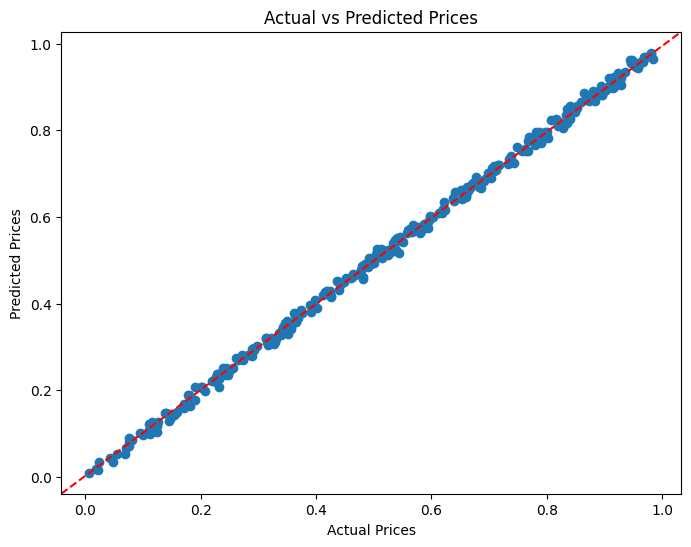

In [7]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')

# Plot predicted prices against actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red', linestyle='--')
plt.show()

# **Report**

**Data Preprocessing**
- I looked for any missing values and, in the interest of simplicity, opted to remove any rows that had any.
- To make sure the features are on the same scale, I used Min-Max scaling to equalize them.

**Model Development**
- Based on the above features, I employed a linear regression model to forecast housing prices.
- 30% of the data were used for testing, while the remaining 70% were used to train the model.

**Model Evaluation**
- The model's performance was assessed by calculating the Mean Squared Error (MSE) and R-squared values.
-An easy way to see how well the model worked was to look at a scatter plot of actual against expected pricing.

**Challenges and Solutions**
- Managing missing values was one of the challenges. I decided to discard them, but in a practical situation, I might think about imputation techniques.
- It took rigorous visualization to understand the links between attributes and costs. To obtain understanding, I employed correlation matrices and scatter plots.

**Conclusion**
- Real estate brokers can get help evaluating house prices based on different aspects by using the created multiple regression model. Even if the model seems promising, outliers and the intricacy of real estate markets can have an impact on its accuracy. Future advancements might include adding more features for improved forecasts or utilizing more sophisticated models.